In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [21]:
data = pd.read_csv('../../data/raw/heart.csv')
data_clean = data.loc[(data['Cholesterol'] != 0) & (data['RestingBP'] != 0)]

In [26]:

print(f"Original records: {len(data)}, Clean records: {len(data_clean)}")
print(f"\nHeart Disease Distribution:")
distribution = data_clean['HeartDisease'].value_counts()
print(f"No Heart Disease (0): {distribution[0]} patients ({distribution[0]/len(data_clean)*100:.1f}%)")
print(f"Heart Disease (1): {distribution[1]} patients ({distribution[1]/len(data_clean)*100:.1f}%)")

Original records: 918, Clean records: 746

Heart Disease Distribution:
No Heart Disease (0): 390 patients (52.3%)
Heart Disease (1): 356 patients (47.7%)


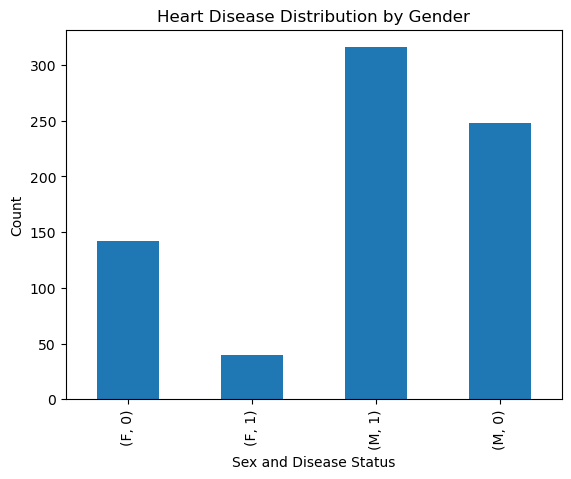

In [33]:
#Bar plot for categorical data
plt.figure()
data_clean.groupby('Sex')['HeartDisease'].value_counts().plot(kind='bar')
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Sex and Disease Status')
plt.ylabel('Count')
plt.savefig('../../data/figures/gender_distribution.png', bbox_inches='tight')
plt.show()

- More men than women in the study
- Men have more cases of both having and not having heart disease
- Women have fewer cases overall

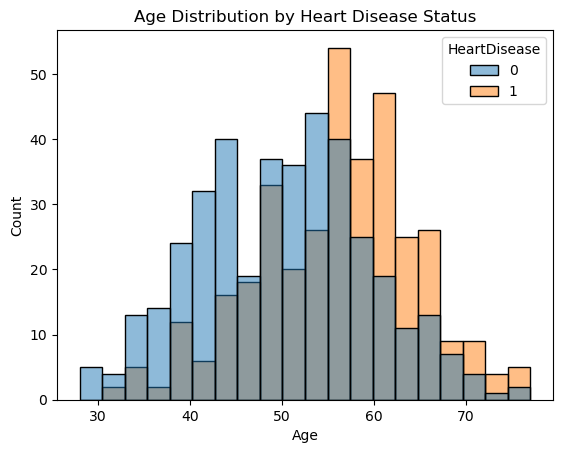

In [29]:
# Age Distribution 

plt.figure()
sns.histplot(data=data_clean, x='Age', hue='HeartDisease', bins=20)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('../../data/figures/age_distribution.png', bbox_inches='tight')
plt.show()

- People between 50-65 years old have more heart disease
- Younger people (30-40) have less heart disease
- After age 65, the number of cases drops (probably because we have fewer 65+ in the dataset)

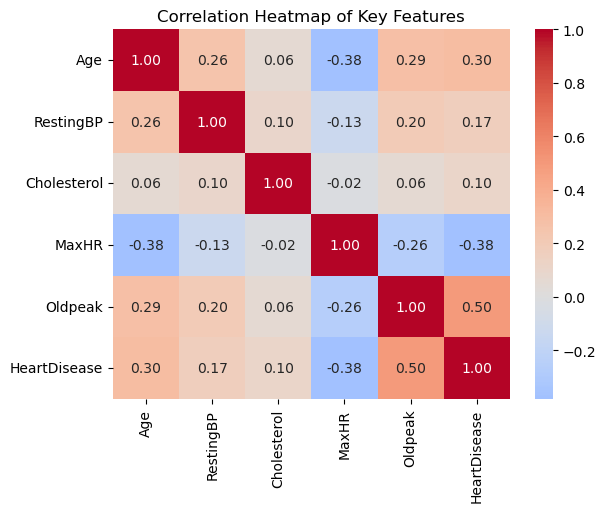

In [32]:
# Correlation Heatmap

numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure()
correlation = data_clean[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Key Features')
plt.savefig('../../data/figures/correlation_heatmap.png', bbox_inches='tight')
plt.show()

- Oldpeak has strongest connection to heart disease (0.50)
- MaxHR has negative connection (-0.38) meaning lower heart rate might indicate heart disease
- Age shows some connection (0.30) to heart disease